# Predict the effect on diabetes

## Import Packages

In [14]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

import tensorflow as tf
from tensorflow.keras.utils import plot_model

import random
import seaborn as sns

import plotly.express as px

## Data Preprocessing

In [15]:
data = pd.read_csv('diabetes.csv')
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [16]:
# check the describe
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [17]:
print(data.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB
None


In [18]:
# 각 Column별 값 분포 시각화
for col in data.columns:
  fig = px.histogram(data, x=col, nbins=20)
  fig.show()

In [19]:
# 혈압, 피부두께, 인슐린, 글루코스, BMI가 0인 이상치 처리
outlier = ['Glucose', 'BloodPressure', 'SkinThickness', 'Insulin', 'BMI']

# outlier들 중 0인 값들 median(중앙값)으로 대체
data[outlier] = data[outlier].replace(0, np.median(data[outlier]))

In [20]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.00000,768.00000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.18750,71.15625,33.837240,101.713542,32.637109,0.471876,33.240885,0.348958
std,3.369578,31.05534,13.38027,11.385657,101.418563,7.035022,0.331329,11.760232,0.476951
min,0.000000,44.00000,24.00000,7.000000,14.000000,18.200000,0.078000,21.000000,0.000000
25%,1.000000,99.00000,62.00000,25.000000,45.000000,27.500000,0.243750,24.000000,0.000000
50%,3.000000,117.00000,72.00000,35.000000,45.000000,32.400000,0.372500,29.000000,0.000000
75%,6.000000,140.25000,80.00000,45.000000,127.250000,36.825000,0.626250,41.000000,1.000000
max,17.000000,199.00000,122.00000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


<AxesSubplot:>

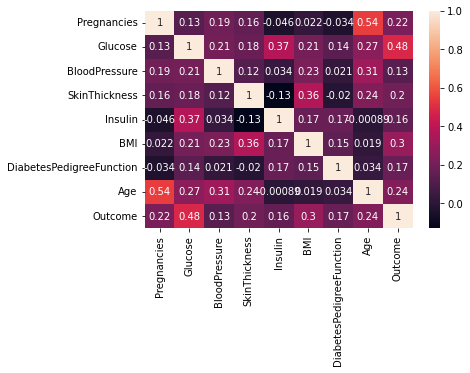

In [21]:
sns.heatmap(data.corr(method = 'pearson'), annot = True)

### Check for Missing Values

In [22]:
data.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

### X, Y data segmentation

In [23]:
X = data.iloc[:, :-1]
Y = data.iloc[:, -1]

In [24]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,45,33.6,0.627,50
1,1,85,66,29,45,26.6,0.351,31
2,8,183,64,45,45,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [25]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


### Normalization

In [26]:
min_X = np.min(X, axis = 0)
max_X = np.max(X, axis = 0)

In [27]:
X = np.asarray((X - min_X) / (max_X - min_X))
Y = np.asarray(Y)

In [11]:
'''
from sklearn.preprocessing import StandardScaler
X = StandardScaler().fit_transform(X)
X
'''

array([[ 0.63994726,  0.84832379,  0.14964075, ...,  0.20401277,
         0.46849198,  1.4259954 ],
       [-0.84488505, -1.12339636, -0.16054575, ..., -0.68442195,
        -0.36506078, -0.19067191],
       [ 1.23388019,  1.94372388, -0.26394125, ..., -1.10325546,
         0.60439732, -0.10558415],
       ...,
       [ 0.3429808 ,  0.00330087,  0.14964075, ..., -0.73518964,
        -0.68519336, -0.27575966],
       [-0.84488505,  0.1597866 , -0.47073225, ..., -0.24020459,
        -0.37110101,  1.17073215],
       [-0.84488505, -0.8730192 ,  0.04624525, ..., -0.20212881,
        -0.47378505, -0.87137393]])

In [28]:
X

array([[0.35294118, 0.67096774, 0.48979592, ..., 0.31492843, 0.23441503,
        0.48333333],
       [0.05882353, 0.26451613, 0.42857143, ..., 0.17177914, 0.11656704,
        0.16666667],
       [0.47058824, 0.89677419, 0.40816327, ..., 0.10429448, 0.25362938,
        0.18333333],
       ...,
       [0.29411765, 0.49677419, 0.48979592, ..., 0.16359918, 0.07130658,
        0.15      ],
       [0.05882353, 0.52903226, 0.36734694, ..., 0.24335378, 0.11571307,
        0.43333333],
       [0.05882353, 0.31612903, 0.46938776, ..., 0.24948875, 0.10119556,
        0.03333333]])

### train/test data segmentation

In [13]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size = 0.2, shuffle = True, stratify = Y, random_state = 1)

In [14]:
print(train_X.shape)
print(test_X.shape)
print(train_Y.shape)
print(test_Y.shape)

(614, 8)
(154, 8)
(614,)
(154,)


## Artificial Neural Network Learning

### Epoch Settings

In [15]:
EPOCHS = 50

### Construction of Artificial Neural Network

In [16]:
model = tf.keras.Sequential([
    tf.keras.layers.Dense(8),
    tf.keras.layers.Dense(16, activation = 'relu'),
    tf.keras.layers.Dense(64, activation = 'relu'),
    tf.keras.layers.Dense(128, activation = 'relu'),
    tf.keras.layers.Dropout(rate = 0.8),
    tf.keras.layers.Dense(1, activation = 'sigmoid')
])

### Compile

In [17]:
model.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Learning

In [18]:
early_stop = tf.keras.callbacks.EarlyStopping(monitor = 'val_loss', patience = 10)

In [19]:
history = model.fit(train_X, train_Y, epochs = EPOCHS,
                    validation_data = (test_X, test_Y),
                    callbacks = [early_stop])

Epoch 1/50
20/20 [==============================] - 1s 18ms/step - loss: 0.6743 - accuracy: 0.5863 - val_loss: 0.5910 - val_accuracy: 0.7013
Epoch 2/50
20/20 [==============================] - 0s 4ms/step - loss: 0.5792 - accuracy: 0.7199 - val_loss: 0.5377 - val_accuracy: 0.7273
Epoch 3/50
20/20 [==============================] - 0s 3ms/step - loss: 0.5196 - accuracy: 0.7345 - val_loss: 0.5176 - val_accuracy: 0.7597
Epoch 4/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4984 - accuracy: 0.7410 - val_loss: 0.5141 - val_accuracy: 0.7792
Epoch 5/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4975 - accuracy: 0.7720 - val_loss: 0.5115 - val_accuracy: 0.7597
Epoch 6/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4755 - accuracy: 0.7785 - val_loss: 0.5037 - val_accuracy: 0.7792
Epoch 7/50
20/20 [==============================] - 0s 3ms/step - loss: 0.4788 - accuracy: 0.7687 - val_loss: 0.5049 - val_accuracy: 0.7727
Epoch 8/50
20/20 [=

## Print the Performance Graph

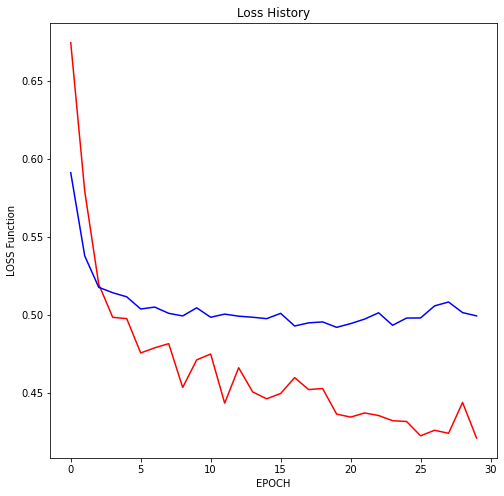

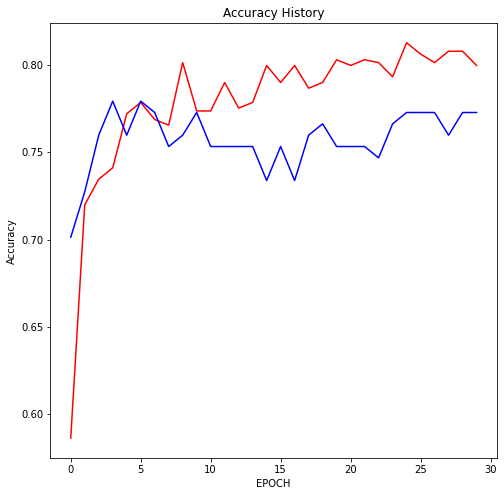

In [20]:
train_history = history.history["loss"]
validation_history = history.history["val_loss"]
fig = plt.figure(figsize = (8, 8))
plt.title("Loss History")
plt.xlabel("EPOCH")
plt.ylabel("LOSS Function")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("train_history.png")

train_history = history.history["accuracy"]
validation_history = history.history["val_accuracy"]
fig = plt.figure(figsize = (8, 8))
plt.title("Accuracy History")
plt.xlabel("EPOCH")
plt.ylabel("Accuracy")
plt.plot(train_history, "red")
plt.plot(validation_history, 'blue')
fig.savefig("accuracy_history.png")

In [30]:
print('정확도 %.4f' % model.evaluate(train_X, train_Y)[1])

20/20 [==============================] - 0s 695us/step - loss: 0.4283 - accuracy: 0.7980
정확도 0.7980


## Predict

In [21]:
y_pred = model.predict(test_X)
print(y_pred)

[[4.41806912e-02]
 [4.22109067e-02]
 [1.05586946e-02]
 [3.92275661e-01]
 [4.12097663e-01]
 [1.46839291e-01]
 [6.42961264e-03]
 [1.97636187e-02]
 [7.37415612e-01]
 [7.51927495e-03]
 [2.72466481e-01]
 [6.52340055e-03]
 [7.23231316e-01]
 [5.82796335e-03]
 [1.01070404e-02]
 [3.22643280e-01]
 [2.34866112e-01]
 [5.06099284e-01]
 [3.16160023e-02]
 [5.64848185e-01]
 [7.20405698e-01]
 [9.83676016e-02]
 [1.64501607e-01]
 [1.08132452e-01]
 [2.23462462e-01]
 [3.45093995e-01]
 [4.27408963e-01]
 [1.57319009e-02]
 [7.61538744e-03]
 [6.73796833e-02]
 [1.92164183e-02]
 [9.00775194e-04]
 [1.01527989e-01]
 [1.66389257e-01]
 [8.08953285e-01]
 [7.45667458e-01]
 [1.27511293e-01]
 [8.27363670e-01]
 [2.70160019e-01]
 [2.59308815e-01]
 [4.11094129e-02]
 [9.17982817e-01]
 [2.54382312e-01]
 [3.88417065e-01]
 [3.02111685e-01]
 [1.34950131e-01]
 [3.35233986e-01]
 [3.50464284e-01]
 [6.47068977e-01]
 [9.50042009e-01]
 [8.07338953e-03]
 [1.37881815e-01]
 [6.25724077e-01]
 [2.87652194e-01]
 [2.83189386e-01]
 [2.046410